Recruitment Data 
Data showing all the recruitment in the last 12 months has been provided. 
The names contained in this data are totally fictitious. However, if a person has applied for multiple jobs, they will have the same fictitious name. 
We are interested to see what insights you can deduce from this data.
Some suggestions are: 

•	Analysis of the recruitment process

•	time to hire, 

•	attraction data (i.e. where are we attracting from) – which background of the applicants: previous job of applicant/cultural or ethnic background/country of applicant?

•	dropout rates

•	recruitment rounds where nobody is successful – which job did no one pass the application process or interview process?

•	Gender that apply and are more recruited


More ideas on what to analyse in this project?
•	
•	How many applicants drop out during the application process? -percentage calculated.

•	How many applicants were shortlisted for an interview?


•	How many applicants were rejected after the initial sift – do not pass to the interview stage?


•	How many applicants passed the interview?


•	How many applicants were rejected after the interview? 


•	Can calculate percentages for these above.


•	How many applicants were offered a contract after the interview?

•	How many contracts were accepted by applicants?

•	How many contracts were rejected by applicants?

•	How many applicants accepted then cancelled/returned the contract? Reasons for this?

•	Can calculate percentages for the above?


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_excel('/content/Recruitment Data - 1 Year.xlsx',skiprows = 7)
df.head()

,Job Title,Job Ref,Category,Location,Faculty/Division,School/Department,Subject Group/Team,Salary From,Salary To,Salary Suffix,...,App Work Permit Required,App Sex,App Disability,App Ethnic Origin,App Nationality,App Source,App Decision,App Final Decision,App Total Essential Score,App Total Score
0,Business Student Systems Analyst,1080-21,Operational/Admin Support/Manual/Specialist,Hull,Academic Registrar,Academic Registrar,Student Information Systems Team,43434,50296,per annum,...,Yes,NaN,NaN,NaN,NaN,agency (Gravitas Recruitment Group),Shortlisted,Contract Returned,NaN,NaN
1,PDRA in Gravity Current Dynamics,AE0205,Researchers,Hull,Institutes,Energy and Environment Institute,Energy and Environment Institute,34804,40322,per annum,...,NaN,Female,No,Other Black background,NIGERIAN,Jobs.ac.uk,Rejected,Reject,4.0,4.0
2,PDRA in Gravity Current Dynamics,AE0205,Researchers,Hull,Institutes,Energy and Environment Institute,Energy and Environment Institute,34804,40322,per annum,...,NaN,Male,No,Chinese,CHINESE,Jobs.ac.uk,Shortlisted,Withdrawn,24.0,24.0
3,PDRA in Gravity Current Dynamics,AE0205,Researchers,Hull,Institutes,Energy and Environment Institute,Energy and Environment Institute,34804,40322,per annum,...,Yes,Male,No,Prefer not to say,DUTCH,Twitter,Rejected,Reject,20.0,20.0
4,PDRA in Gravity Current Dynamics,AE0205,Researchers,Hull,Institutes,Energy and Environment Institute,Energy and Environment Institute,34804,40322,per annum,...,Yes,Male,No,Black/Black British - African,BRITISH (NOT CHANNEL ISLANDS OR IOM),Word of mouth,Rejected,Reject,23.0,23.0


**Data Preprocesing**

In [55]:
df.shape

(4753, 37)

**Data type of all columns**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4753 entries, 0 to 4752
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Job Title                  4753 non-null   object        
 1   Job Ref                    4753 non-null   object        
 2   Category                   4753 non-null   object        
 3   Location                   4753 non-null   object        
 4   Faculty/Division           4753 non-null   object        
 5   School/Department          4753 non-null   object        
 6   Subject Group/Team         4753 non-null   object        
 7   Salary From                4753 non-null   int64         
 8   Salary To                  4753 non-null   int64         
 9   Salary Suffix              3620 non-null   object        
 10  Salary Extra               2687 non-null   object        
 11  Release Date               4753 non-null   datetime64[ns]
 12  Closin

**Check the missing values of Dataset**

In [57]:
df.isnull().sum()

Job Title                       0
Job Ref                         0
Category                        0
Location                        0
Faculty/Division                0
School/Department               0
Subject Group/Team              0
Salary From                     0
Salary To                       0
Salary Suffix                1133
Salary Extra                 2066
Release Date                    0
Closing Date                    0
Shortlist By Date               0
Interview Date                  0
Direct Link Only                0
Work Permit Warning             0
Num App Form Criteria           0
Num Scoring Criteria            0
Num Interview Criteria          0
Owner                           0
App Id                          0
App Title                       0
Name, Combined                  0
App Submitted                   0
App Job Title                2839
App Age Range                  10
App Work Permit Required     2130
App Sex                        10
App Disability

**Fill the missing values using interpolate method**

In [58]:
df.interpolate(method='pad',inplace=True)
df.interpolate(method='backfill',limit_direction='backward',inplace=True)


**Fill the missing values of categorical features using fillna() Mode.**

In [59]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

**Missing values is filled**

In [60]:
df.isnull().sum()

Job Title                    0
Job Ref                      0
Category                     0
Location                     0
Faculty/Division             0
School/Department            0
Subject Group/Team           0
Salary From                  0
Salary To                    0
Salary Suffix                0
Salary Extra                 0
Release Date                 0
Closing Date                 0
Shortlist By Date            0
Interview Date               0
Direct Link Only             0
Work Permit Warning          0
Num App Form Criteria        0
Num Scoring Criteria         0
Num Interview Criteria       0
Owner                        0
App Id                       0
App Title                    0
Name, Combined               0
App Submitted                0
App Job Title                0
App Age Range                0
App Work Permit Required     0
App Sex                      0
App Disability               0
App Ethnic Origin            0
App Nationality              0
App Sour

**Columns of dataset**

In [61]:
df.columns

Index(['Job Title', 'Job Ref', 'Category', 'Location', 'Faculty/Division',
       'School/Department', 'Subject Group/Team', 'Salary From', 'Salary To',
       'Salary Suffix', 'Salary Extra', 'Release Date', 'Closing Date',
       'Shortlist By Date', 'Interview Date', 'Direct Link Only',
       'Work Permit Warning', 'Num App Form Criteria', 'Num Scoring Criteria',
       'Num Interview Criteria', 'Owner', 'App Id', 'App Title',
       'Name, Combined', 'App Submitted', 'App Job Title', 'App Age Range',
       'App Work Permit Required', 'App Sex', 'App Disability',
       'App Ethnic Origin', 'App Nationality', 'App Source', 'App Decision',
       'App Final Decision', 'App Total Essential Score', 'App Total Score'],
      dtype='object')

**See the duplicated of specific columns**

In [62]:
columns=['Job Title','Faculty/Division','School/Department','Salary Suffix','Salary Extra','App Job Title','App Nationality']

In [63]:
dups_color_and_shape = df.pivot_table(columns=columns, aggfunc='size')
print (dups_color_and_shape)

Job Title                                                                 Faculty/Division                         School/Department             Salary Suffix       Salary Extra                                                 App Job Title                    App Nationality                     
2 x Business Process Design Officer                                       Academic Registrar                       Academic Registrar            per annum           Fixed Term - 6 Months                                        Business Development Consultant  BRITISH (NOT CHANNEL ISLANDS OR IOM)    2
                                                                                                                                                                                                                                  Customer Experience Team Leader  BRITISH (NOT CHANNEL ISLANDS OR IOM)    1
                                                                                                      

**Renaming the column names for better identification**

In [64]:
#Renaming the column names for better identification
df = df.rename(columns={'Job Title':'Job_Title', 'Job Ref':'Job_Ref', 'Faculty/Division':'Faculty_Division',
       'School/Department':'School_Department', 'Subject Group/Team':'Subject_Group_Team', 'Salary From':'Salary_from', 'Salary To':'Salary_To', 'Salary Suffix':'Salary_Suffix',
       'Salary Extra':'Salary_Extra', 'Release Date':'Release_Date','Closing Date':'Closing_Date','Shortlist By Date':'Shortlist_by_Date', 'Interview Date':'Interview_Date', 'Direct Link Only':'Direct_Link_Only',
       'Work Permit Warning':'Work_Permit_Warning', 'Num App Form Criteria':'Num_App_Form_Criteria', 'Num Scoring Criteria':'Num_Scoring_Criteria',
       'Num Interview Criteria':'Num_Interview_Criteria', 'App Id':'App_Id', 'App Title':'App_Title',
       'Name, Combined':'Name_Combined', 'App Submitted':'App_Submitted', 'App Job Title':'App_Job_Title', 'App Age Range':'Age_Range',
       'App Work Permit Required':'Work_Permit_Required', 'App Sex':'App_Sex', 'App Disability':'App_Disability',
       'App Ethnic Origin':'App_Ethnic_Origin', 'App Nationality':'App_Nationality', 'App Source':'App_Source', 'App Decision':'App_Decision',
       'App Final Decision':'App_Final_Decision', 'App Total Essential Score':'App_Total_Essential_Score', 'App Total Score':'App_Total_Score'})

# Analysis of the recruitment process

In [65]:
df.columns

Index(['Job_Title', 'Job_Ref', 'Category', 'Location', 'Faculty_Division',
       'School_Department', 'Subject_Group_Team', 'Salary_from', 'Salary_To',
       'Salary_Suffix', 'Salary_Extra', 'Release_Date', 'Closing_Date',
       'Shortlist_by_Date', 'Interview_Date', 'Direct_Link_Only',
       'Work_Permit_Warning', 'Num_App_Form_Criteria', 'Num_Scoring_Criteria',
       'Num_Interview_Criteria', 'Owner', 'App_Id', 'App_Title',
       'Name_Combined', 'App_Submitted', 'App_Job_Title', 'Age_Range',
       'Work_Permit_Required', 'App_Sex', 'App_Disability',
       'App_Ethnic_Origin', 'App_Nationality', 'App_Source', 'App_Decision',
       'App_Final_Decision', 'App_Total_Essential_Score', 'App_Total_Score'],
      dtype='object')

**Salary Of Every Department**

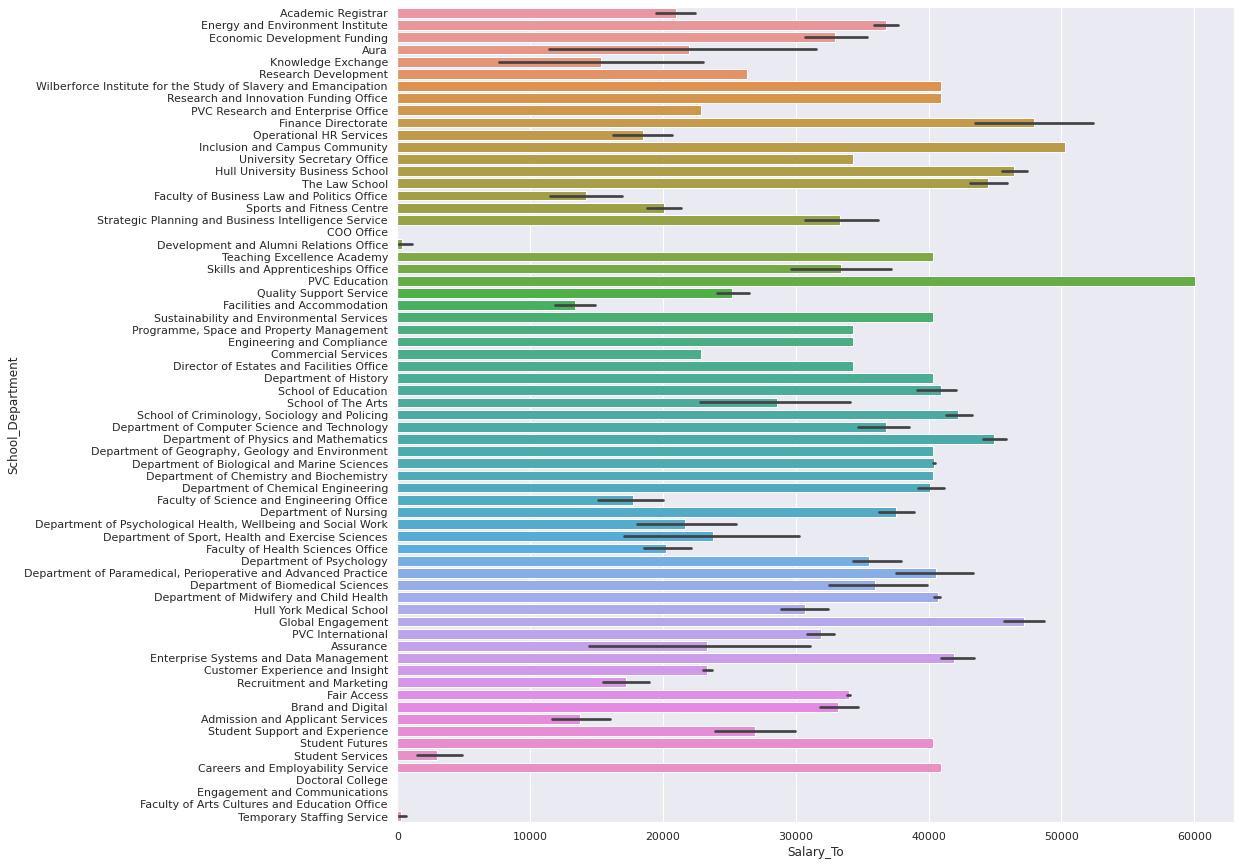

In [66]:

sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(x='Salary_To',y='School_Department',data=df,orient='h')


**Performance(Total Score) of Applicant of different locations**

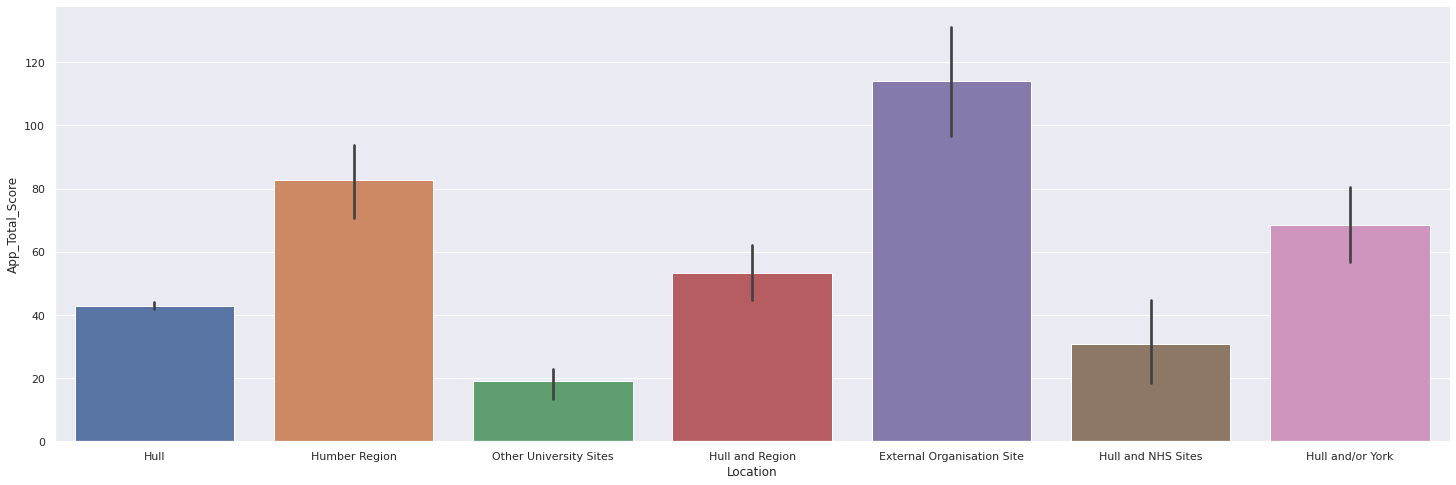

In [67]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.barplot(x='Location',y='App_Total_Score',data=df)

**Faculity of Different Division**

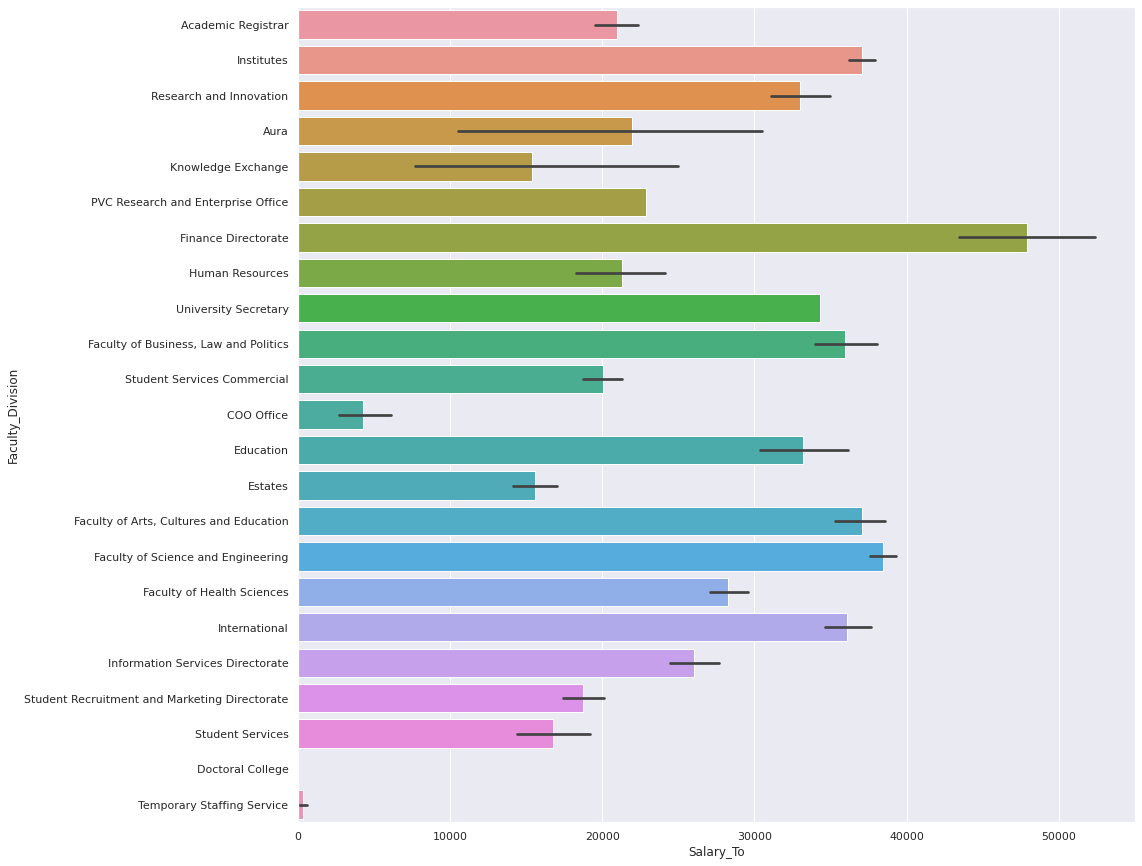

In [68]:


sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(x='Salary_To',y='Faculty_Division',data=df,orient='h')




**Performance(Total Score) of Male,Female and Others**

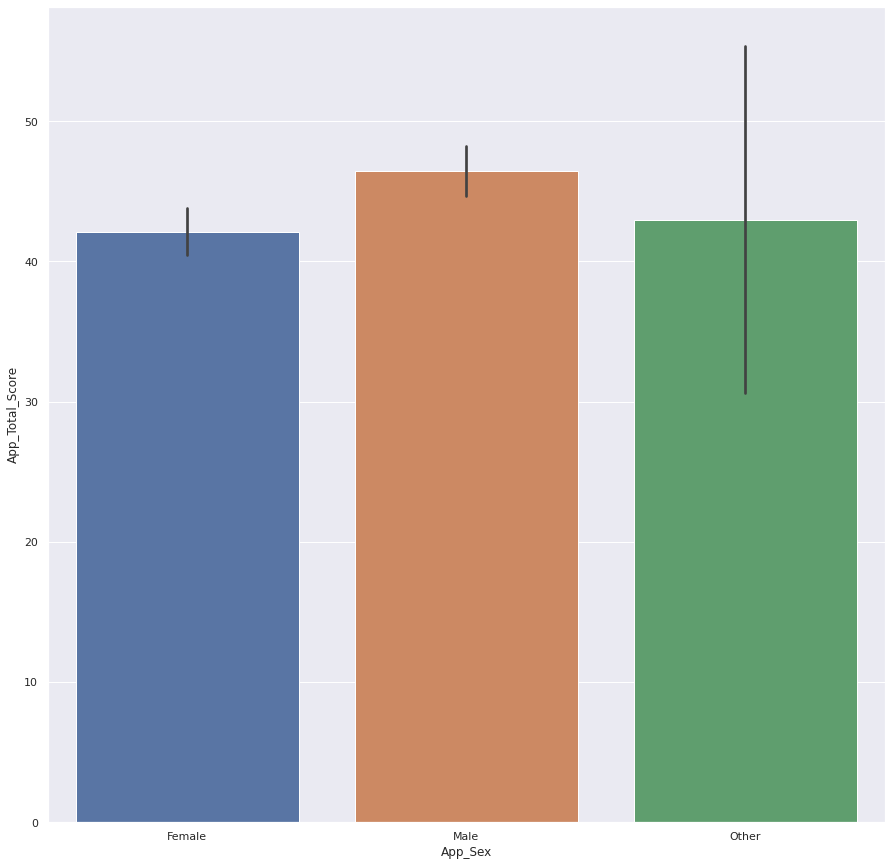

In [69]:
sns.barplot(x='App_Sex',y='App_Total_Score',data=df)

# **Time to hire**

**Convert object into datetime**

In [70]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Closing_Date'] = pd.to_datetime(df['Closing_Date'])
df['Shortlist_by_Date'] = pd.to_datetime(df['Shortlist_by_Date'])
df['Interview_Date'] = pd.to_datetime(df['Interview_Date'])


In [71]:

df['year_month_of_interview'] = df['Interview_Date'].map(lambda dt: dt.strftime('%Y-%m'))


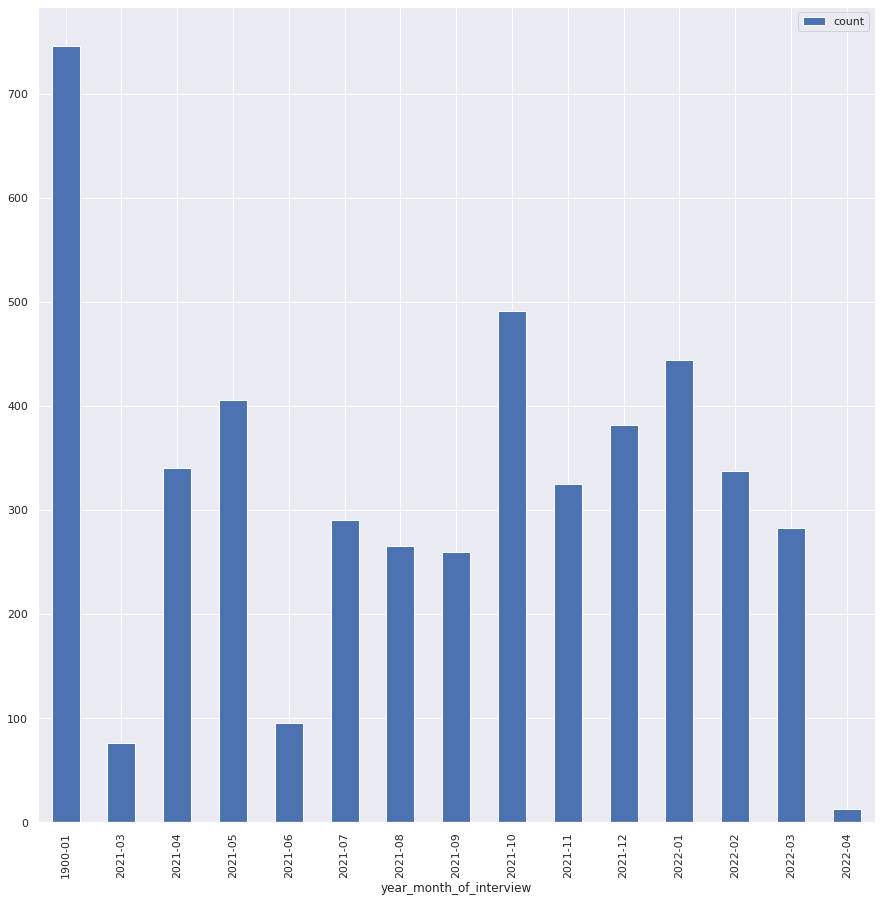

In [72]:

grouped_df = df.groupby('year_month_of_interview').size().to_frame("count").reset_index()

grouped_df.plot(kind='bar', x='year_month_of_interview', y='count')

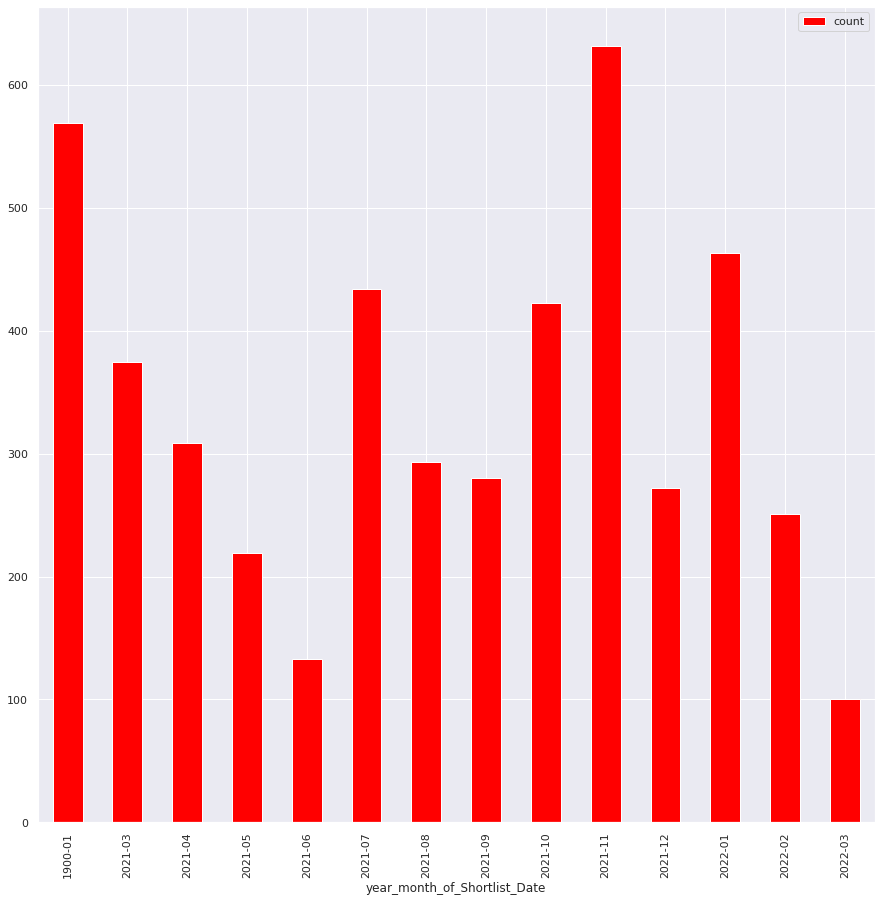

In [73]:

df['year_month_of_Shortlist_Date'] = df['Shortlist_by_Date'].map(lambda dt: dt.strftime('%Y-%m'))
grouped_df = df.groupby('year_month_of_Shortlist_Date').size().to_frame("count").reset_index()

grouped_df.plot(kind='bar', x='year_month_of_Shortlist_Date', y='count',color='red')

# **Background of the applicants**

In [74]:
applicant_background=df[['Name_Combined','App_Job_Title', 'App_Disability','App_Sex','App_Ethnic_Origin','App_Nationality']]
applicant_background.head(20)

,Name_Combined,App_Job_Title,App_Disability,App_Sex,App_Ethnic_Origin,App_Nationality
0,Tabetha Marquerite,"Administrator, Registry Services",No,Female,Other Black background,NIGERIAN
1,Thomas Keenen,"Administrator, Registry Services",No,Female,Other Black background,NIGERIAN
2,Darlene Tiago,"Administrator, Registry Services",No,Male,Chinese,CHINESE
3,Cherie Shimika,"Administrator, Registry Services",No,Male,Prefer not to say,DUTCH
4,Milton Sherly,"Administrator, Registry Services",No,Male,Black/Black British - African,BRITISH (NOT CHANNEL ISLANDS OR IOM)
5,Joaquin Rahel,"Administrator, Registry Services",Yes,Male,White,BRITISH (NOT CHANNEL ISLANDS OR IOM)
6,Liza Philbert,"Administrator, Registry Services",No,Female,White,ITALIAN
7,Rodrick Kyera,"Administrator, Registry Services",No,Male,Other White background,AMERICAN
8,Stella Krissie,"Administrator, Registry Services",No,Male,White,ICELANDIC
9,Katelynn Emylee,"Administrator, Registry Services",No,Male,Prefer not to say,MAURITIAN


**Ethnic_Origin of applicant**

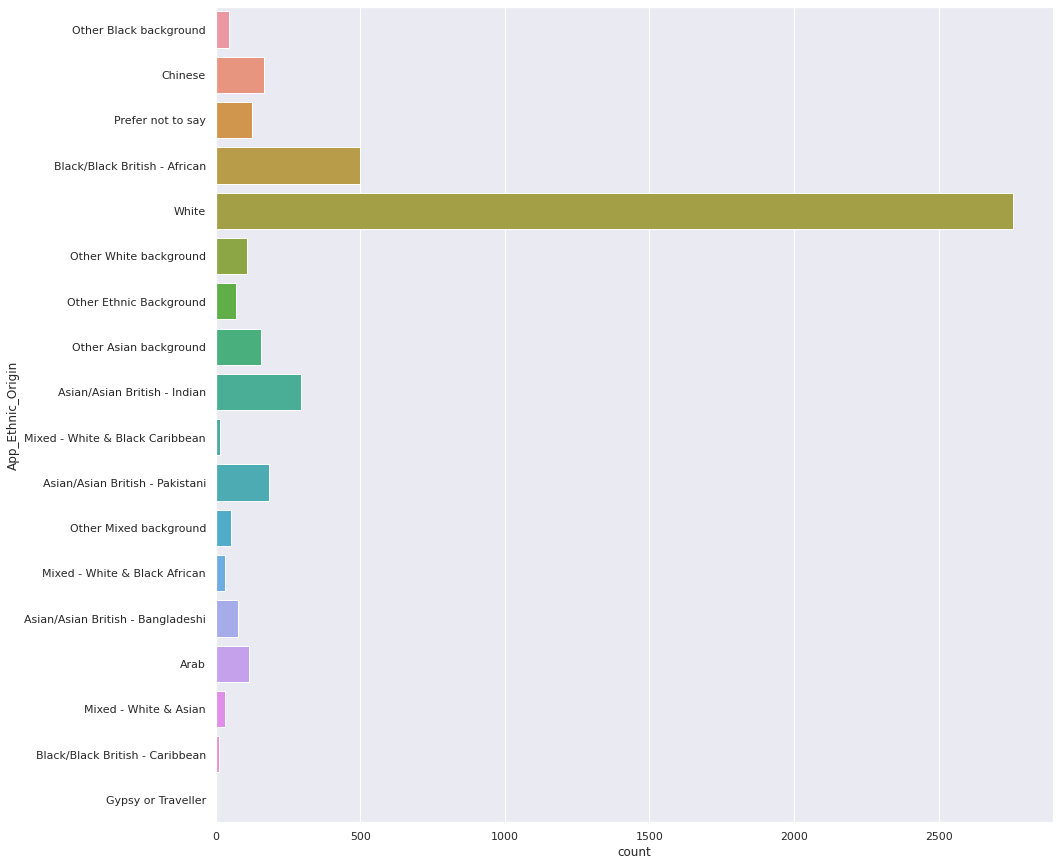

In [75]:
sns.countplot(y ='App_Ethnic_Origin', data = df)

**Age Range of applicant**

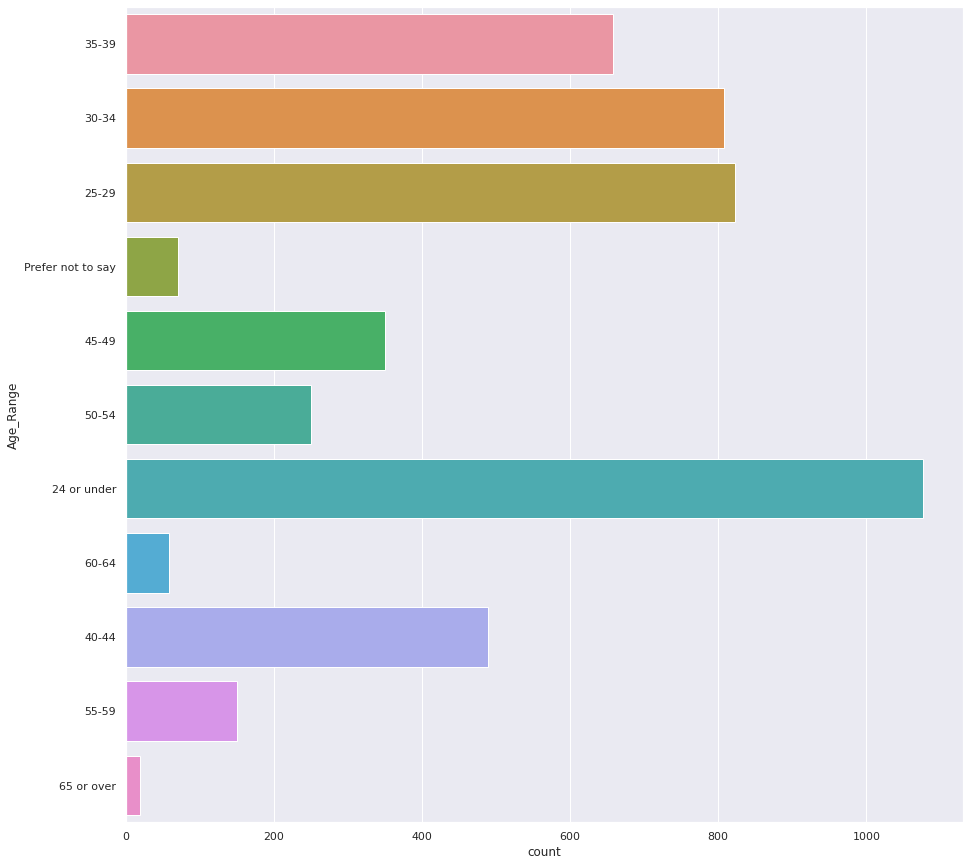

In [76]:
sns.countplot(y='Age_Range',data=df)

**Country of applicant**

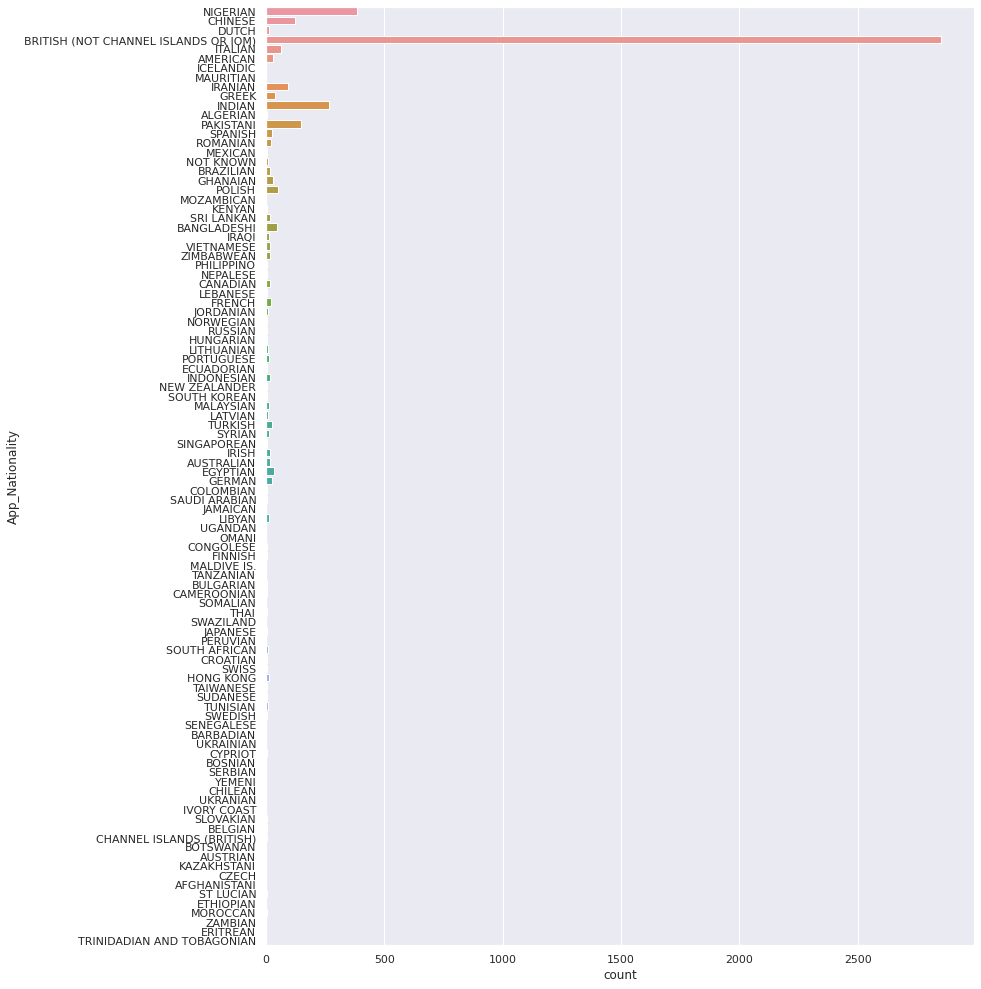

In [77]:
sns.set(rc={'figure.figsize':(12.7,17.27)})
sns.countplot(y ='App_Nationality', data = df)


**Dropout rates**

For Dropout:'Withdrawn', 'Unable To Attend', 'Interview Declined', 'Did Not Attend'

For not successful: 'Reject', 'Reject No Email', 'Post Removed'

In [78]:
dropout_df=df[((df['App_Final_Decision'])=='Withdrawn') | ((df['App_Final_Decision'])=='Unable To Attend') 
                                      | ((df['App_Final_Decision'])=='Interview Declined') | ((df['App_Final_Decision'])=='Did Not Attend')]
dropout_df['App_Final_Decision'].to_frame().head()
                                    

,App_Final_Decision
2,Withdrawn
11,Withdrawn
20,Unable To Attend
32,Interview Declined
36,Withdrawn


In [79]:

print('the total applicant are ',len(df), 'dropout applicant is',len(dropout_df))


the total applicant are  4753 dropout applicant is 247


**recruitment rounds where nobody is successful – which job did no one pass the application process or interview process?**

In [80]:


not_successful_df=df[((df['App_Final_Decision'])=='Reject') | ((df['App_Final_Decision'])=='Reject No Email') 
                                      | ((df['App_Final_Decision'])=='Post Removed')]
not_successful_df['Job_Title'].to_frame().head()
                                    

,Job_Title
1,PDRA in Gravity Current Dynamics
3,PDRA in Gravity Current Dynamics
4,PDRA in Gravity Current Dynamics
7,PDRA in Gravity Current Dynamics
8,PDRA in Gravity Current Dynamics


**Gender that apply and are more recruited**


the Gender that apply for job are
Male      2374
Female    2345
Other       34
Name: App_Sex, dtype: int64


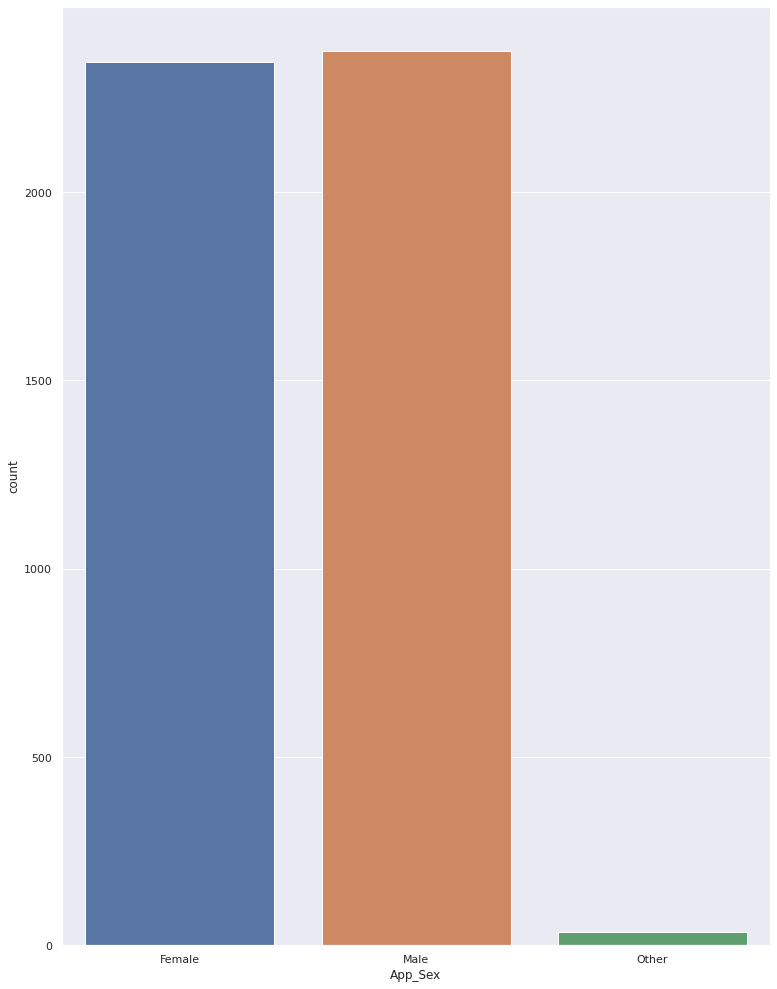

In [81]:
print("the Gender that apply for job are")
print(df.App_Sex.value_counts())
sns.countplot(x='App_Sex',data=df)

In [82]:
df_gender_hired=df[(df['Num_Interview_Criteria'])!=0.0]
print("Gender that are recruited for job")
df_gender_hired.App_Sex.value_counts()

Gender that are recruited for job


Male      1961
Female    1762
Other       25
Name: App_Sex, dtype: int64

# More ideas on what to analyse in this project? 

**How many applicants drop out during the application process? -percentage calculated.**

In [83]:
print("The percentage of applicant that drop out during application process",((len(dropout_df))/(len(df)))*100,"%")


The percentage of applicant that drop out during application process 5.196717862402693 %


How many applicants were shortlisted for an interview?





In [84]:
df.App_Decision.unique()

array(['Shortlisted', 'Rejected', 'Reserved'], dtype=object)

In [85]:
# len(df.App_Decision=="Shortlisted")
shorlisted_applicant=df[(df['App_Decision'])=="Shortlisted"]
shorlisted_applicant['App_Decision'].to_frame().head()


,App_Decision
0,Shortlisted
2,Shortlisted
5,Shortlisted
6,Shortlisted
11,Shortlisted


In [86]:
print("The total applicant that were shortlisted for interview",len(shorlisted_applicant))

The total applicant that were shortlisted for interview 1488


**•	How many applicants were rejected after the initial sift – do not pass to the interview stage?**


In [87]:
rejected_applicant=df[(df['App_Decision'])=="Rejected"]
rejected_applicant['App_Decision'].to_frame().head()

,App_Decision
1,Rejected
3,Rejected
4,Rejected
7,Rejected
8,Rejected


In [88]:
print("the total applicant that are rejected before interview",len(rejected_applicant))

the total applicant that are rejected before interview 2621



**How many applicants passed the interview?**

In [89]:
df['App_Final_Decision'].unique()

array(['Contract Returned', 'Reject', 'Withdrawn',
       'Rejected After Interview', 'Unable To Attend',
       'Interview Declined', 'Contract Issued', 'Offer Rejected',
       'Onboarding Completed', 'Reject No Email', 'Ready To Export',
       'Offer', 'Interview Accepted', 'Reserved', 'Offer Withdrawn',
       'Reserved After Interview', 'Onboarding', 'Did Not Attend',
       'Contract Issued – ATR', 'Contract Issued – ARO', 'Post Removed',
       'Contract Issued – ATS', 'Reject After Interview (Appointable)',
       'Invited to Interview', 'Offer Accepted', 'Contract Rejected',
       'Shortlisted', 'Decision Not Yet Made'], dtype=object)

In [90]:
#'Contract Returned', 'Contract Issued', 'Offer Rejected', 'Onboarding Completed', 'Offer', 'Offer Withdrawn', 'Onboarding', 'Contract Issued \x96 ATR', 'Contract Issued \x96 ARO', 'Contract Issued \x96 ATS', 'Offer Accepted', 'Contract Rejected'.

In [91]:
accepted_applicant=df[((df['App_Final_Decision'])=='Contract Returned') | ((df['App_Final_Decision'])=='Contract Issued') 
                                      | ((df['App_Final_Decision'])=='Offer Rejected') | ((df['App_Final_Decision'])=='Onboarding Completed')
                                      |((df['App_Final_Decision'])=='Offer') | ((df['App_Final_Decision'])=='Offer Withdrawn')
                                      |((df['App_Final_Decision'])=='Onboarding') | ((df['App_Final_Decision'])=='Contract Issued \x96 ATR')
                                      |((df['App_Final_Decision'])=='Contract Issued \x96 ARO') | ((df['App_Final_Decision'])=='Contract Issued \x96 ATS')
                                      |((df['App_Final_Decision'])=='Offer Accepted') | ((df['App_Final_Decision'])=='Contract Rejected')]
accepted_applicant['App_Final_Decision'].to_frame().head(10)


,App_Final_Decision
0,Contract Returned
5,Contract Returned
23,Contract Returned
35,Contract Returned
44,Contract Issued
45,Contract Returned
50,Offer Rejected
51,Contract Returned
65,Contract Returned
66,Offer Rejected


In [92]:
print("The total applicant that passed the interview",len(accepted_applicant))

The total applicant that passed the interview 606





**How many applicants were rejected after the interview?**

**Can calculate percentages for these above.**










In [93]:
rejected_applicant_after_interview=df[((df['App_Final_Decision'])=='Rejected After Interview') | ((df['App_Final_Decision'])=='Reject After Interview (Appointable)')]
rejected_applicant_after_interview['App_Final_Decision'].to_frame().head()


,App_Final_Decision
6,Rejected After Interview
14,Rejected After Interview
18,Rejected After Interview
24,Rejected After Interview
30,Rejected After Interview


In [94]:
print("The total applicant that are rejected after interview is ",len(rejected_applicant_after_interview))

The total applicant that are rejected after interview is  605


In [95]:
print("The percentage of applicant that are rejected after interview are ",len(rejected_applicant_after_interview)/len(df['App_Final_Decision'])*100,"%")


The percentage of applicant that are rejected after interview are  12.728802861350728 %


**•	How many applicants were offered a contract after the interview?**

In [96]:
offer_contract=df[((df['App_Final_Decision'])=='Contract Issued') | ((df['App_Final_Decision'])=='Contract Issued \x96 ATR') 
                                      | ((df['App_Final_Decision'])=='Contract Issued \x96 ARO') | ((df['App_Final_Decision'])=='Contract Issued \x96 ATS')
                                      | ((df['App_Final_Decision'])=='offer_contract') | ((df['App_Final_Decision'])=='Contract Returned')
                                      | ((df['App_Final_Decision'])=='Contract Rejected') | ((df['App_Final_Decision'])=='Offer')
                                      | ((df['App_Final_Decision'])=='Onboarding') | ((df['App_Final_Decision'])=='Onboarding Completed')]
                                      
offer_contract['App_Final_Decision'].to_frame().head()

,App_Final_Decision
0,Contract Returned
5,Contract Returned
23,Contract Returned
35,Contract Returned
44,Contract Issued


In [97]:
print("the total offer contract are", len(offer_contract))

the total offer contract are 571


**•	How many contracts were accepted by applicants?**

In [98]:

Contract_Accepted=df[((df['App_Final_Decision'])=='Contract Issued') | ((df['App_Final_Decision'])=='Contract Issued \x96 ATR') 
                                      | ((df['App_Final_Decision'])=='Contract Issued \x96 ARO') | ((df['App_Final_Decision'])=='Contract Issued \x96 ATS')
                                      |((df['App_Final_Decision'])=='Onboarding') | ((df['App_Final_Decision'])=='Offer Accepted')
   | ((df['App_Final_Decision'])=='Onboarding Completed')]



Contract_Accepted['App_Final_Decision'].to_frame()



,App_Final_Decision
44,Contract Issued
74,Contract Issued
122,Contract Issued
143,Onboarding Completed
183,Onboarding Completed
...,...
4190,Contract Issued
4192,Contract Issued
4193,Contract Issued
4207,Contract Issued


In [99]:
len(Contract_Accepted)
print("The applicant accept the contract are ",len(Contract_Accepted))

The applicant accept the contract are  76


**How many contracts were rejected by applicants?**

In [100]:

Contract_Rejected=df[(df['App_Final_Decision'])=='Contract Rejected']
Contract_Rejected['App_Final_Decision'].to_frame()


,App_Final_Decision
3312,Contract Rejected


In [101]:
print("The applicant reject the contract are ",len(Contract_Rejected))


The applicant reject the contract are  1


**How many applicants accepted then cancelled/returned the contract? Reasons for this?**

**Can calculate percentages for the above?**

In [102]:

Contract_Returned=df[(df['App_Final_Decision'])=='Contract Returned']
Contract_Returned['App_Final_Decision'].to_frame().head()

,App_Final_Decision
0,Contract Returned
5,Contract Returned
23,Contract Returned
35,Contract Returned
45,Contract Returned


In [103]:
print("The applicant returned the contract are ",len(Contract_Returned))

The applicant returned the contract are  478


In [104]:
print("The percentage of applicant that returned the contract are ",len(Contract_Returned)/len(df['App_Final_Decision'])*100,"%")

The percentage of applicant that returned the contract are  10.056806227645696 %
